In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
%matplotlib inline
date_today = "03"
month_today = "01"
year_today = "2019"

,Temp(deg Centigrade),% Humidity
Year,,
2010,23.885714,73.857143
2011,20.325000,72.125000
2012,22.685714,66.428571
2013,22.800000,62.428571
2014,20.000000,68.875000
2015,18.912500,78.500000
2016,19.775000,63.000000
2017,18.425000,58.250000
2018,19.300000,71.000000


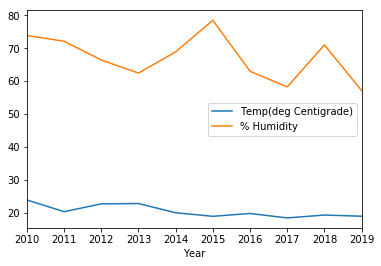

In [2]:
#temp
temp_df = pd.read_excel('./data/weather_historic.xls',  encoding = "utf-8")
temp_df = temp_df[["Local time in Pune","T", "U"]]
temp_df = temp_df.rename(columns = {"T": "Temp(deg Centigrade)", "U": "% Humidity"})
temp_df["Date"], temp_df["Daytime"] = temp_df["Local time in Pune"].str.split(' ', 1).str
tempGroupedDF = temp_df.groupby(['Date']).mean().reset_index()
tempGroupedDF["Day"], tempGroupedDF["Month"], tempGroupedDF["Year"] = tempGroupedDF["Date"].str.split('.').str
tempTodayDF = tempGroupedDF[(tempGroupedDF["Month"] == month_today) & (tempGroupedDF["Day"] == date_today)]
tempTodayDF = tempTodayDF.set_index("Year").drop('Day', 1).drop('Month', 1).drop('Date', 1)
if not tempTodayDF.empty:
    tempTodayDF.plot()
else:
    print("No temp data available")
    
masterDF = tempTodayDF
masterDF

/home/devaroop/Projects/venv_climate_change/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


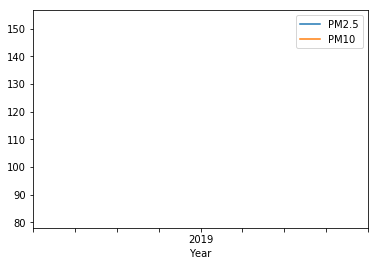

In [3]:
#pm2.5pm10
pmDF = pd.read_excel('./data/pm25pm10-parse.xlsx',  encoding = "utf-8")
pmDF["Date"], pmDF["Time"] = pmDF["Date"].str.split(' ', 1).str
pmDF = pmDF.replace('None', "NaN")
pmDF["PM2.5"] = pmDF["PM2.5"].astype(float)
pmDF["PM10"] = pmDF["PM10"].astype(float)
pmDF["Day"], pmDF["Month"], pmDF["Year"] = pmDF["Date"].str.split('.').str
pmTodayDF = pmDF[(pmDF["Month"] == month_today) & (pmDF["Day"] == date_today)]
pmTodayDF = pmTodayDF.set_index("Year").drop('Day', 1).drop('Month', 1).drop('Date', 1)
if not pmTodayDF.empty:
    pmTodayDF.plot()
    masterDF = pd.merge(masterDF, pmTodayDF, how = "left", left_on = "Year", right_on = "Year")
else:
    print("No pm data available")
    

,Temp(deg Centigrade),% Humidity,PM2.5,PM10,Time,Ozone,NOx,SO2
Year,,,,,,,,
2010,23.885714,73.857143,NaN,NaN,NaN,NaN,NaN,NaN
2011,20.325000,72.125000,NaN,NaN,NaN,NaN,NaN,NaN
2012,22.685714,66.428571,NaN,NaN,NaN,NaN,NaN,NaN
2013,22.800000,62.428571,NaN,NaN,NaN,NaN,NaN,NaN
2014,20.000000,68.875000,NaN,NaN,NaN,NaN,NaN,NaN
2015,18.912500,78.500000,NaN,NaN,NaN,NaN,NaN,NaN
2016,19.775000,63.000000,NaN,NaN,NaN,0.00,55.37,0.00
2017,18.425000,58.250000,NaN,NaN,NaN,0.00,NaN,0.00
2018,19.300000,71.000000,NaN,NaN,NaN,0.00,30.09,0.00


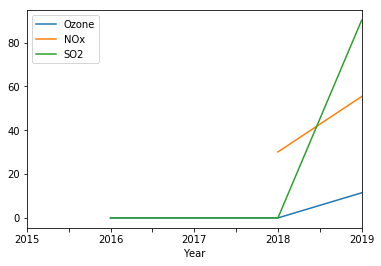

In [4]:
#ozoneNoxSo2
ozoneDF = pd.read_excel('./data/ozone-nox-so2-parsed.xlsx',  encoding = "utf-8")
ozoneDF["Date"], ozoneDF["Time"] = ozoneDF["Date"].str.split(' ', 1).str
ozoneDF["Day"], ozoneDF["Month"], ozoneDF["Year"] = ozoneDF["Date"].str.split('-').str
ozoneDF = ozoneDF.replace('None', "NaN")
ozoneDF["Ozone"] = ozoneDF["Ozone"].astype(float)
ozoneDF["NOx"] = ozoneDF["NOx"].astype(float)
ozoneDF["SO2"] = ozoneDF["SO2"].astype(float)
ozoneTodayDF = ozoneDF[(ozoneDF["Month"] == month_today) & (ozoneDF["Day"] == date_today)]
ozoneTodayDF = ozoneTodayDF.set_index('Year').drop('Day', 1).drop('Month', 1).drop('Date', 1).drop('Time', 1)
if not ozoneTodayDF.empty:
    ozoneTodayDF.plot()
    masterDF = pd.merge(masterDF, ozoneTodayDF, how = "left", left_on = "Year", right_on = "Year")
else:
    print("No ozone, so2, nox data available")

masterDF

,Year,Temp(deg Centigrade),% Humidity,PM2.5,PM10,Time,Ozone,NOx,SO2,Total Vehicles
0,2010,23.885714,73.857143,NaN,NaN,NaN,NaN,NaN,NaN,1722804
1,2011,20.325000,72.125000,NaN,NaN,NaN,NaN,NaN,NaN,2061226
2,2012,22.685714,66.428571,NaN,NaN,NaN,NaN,NaN,NaN,2037869
3,2013,22.800000,62.428571,NaN,NaN,NaN,NaN,NaN,NaN,2.07098e+06
4,2014,20.000000,68.875000,NaN,NaN,NaN,NaN,NaN,NaN,2.23994e+06
5,2015,18.912500,78.500000,NaN,NaN,NaN,NaN,NaN,NaN,2303783
6,2016,19.775000,63.000000,NaN,NaN,NaN,0.00,55.37,0.00,NaN
7,2017,18.425000,58.250000,NaN,NaN,NaN,0.00,NaN,0.00,NaN
8,2018,19.300000,71.000000,NaN,NaN,NaN,0.00,30.09,0.00,NaN
9,2019,18.937500,57.125000,81.55,153.12,00:00,11.45,55.38,90.18,NaN


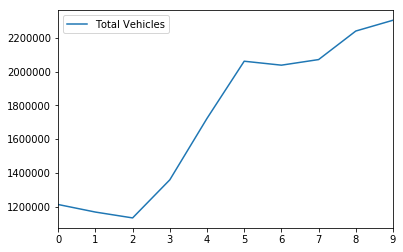

In [5]:
#vehicle
vehicleDF = pd.read_excel('./data/Vehicle2006-2016.xls',  encoding = "utf-8")
vehicleDF = vehicleDF.rename(columns = lambda x: re.sub('-','',x))
vehicleDF = vehicleDF.tail(1)
vehicleDF = vehicleDF.drop('Vehicles', 1)
vehicleDF = vehicleDF.T
vehicleDF = vehicleDF.reset_index()
vehicleDF.columns = ["Year", "Total Vehicles"]
vehicleDF.set_index("Year")
if not vehicleDF.empty:
    vehicleDF.plot()
    masterDF = pd.merge(masterDF, vehicleDF, how = "left", left_on = "Year", right_on = "Year")
else:
    print("No vehicle data available")


masterDF

,Year,Temp(deg Centigrade),% Humidity,PM2.5,PM10,Time,Ozone,NOx,SO2,Total Vehicles,TreeCover(sqkm)
0,2010,23.885714,73.857143,NaN,NaN,NaN,NaN,NaN,NaN,1722804,NaN
1,2011,20.325000,72.125000,NaN,NaN,NaN,NaN,NaN,NaN,2061226,1732.0
2,2012,22.685714,66.428571,NaN,NaN,NaN,NaN,NaN,NaN,2037869,NaN
3,2013,22.800000,62.428571,NaN,NaN,NaN,NaN,NaN,NaN,2.07098e+06,1734.0
4,2014,20.000000,68.875000,NaN,NaN,NaN,NaN,NaN,NaN,2.23994e+06,NaN
5,2015,18.912500,78.500000,NaN,NaN,NaN,NaN,NaN,NaN,2303783,1734.0
6,2016,19.775000,63.000000,NaN,NaN,NaN,0.00,55.37,0.00,NaN,NaN
7,2017,18.425000,58.250000,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1708.0
8,2018,19.300000,71.000000,NaN,NaN,NaN,0.00,30.09,0.00,NaN,NaN
9,2019,18.937500,57.125000,81.55,153.12,00:00,11.45,55.38,90.18,NaN,NaN


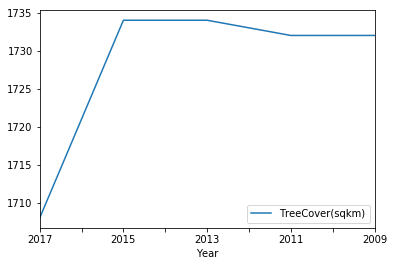

In [6]:
#tree cover
treeDF = pd.read_excel('./data/tree_cover/TreeCoverPune2009-2017.xls',  encoding = "utf-8")
treeDF["Year"] = treeDF["Year"].astype(str)
treeDF = treeDF.set_index("Year")

if not treeDF.empty:
    treeDF.plot()
    masterDF = pd.merge(masterDF, treeDF, how = "left", left_on = "Year", right_on = "Year")
else:
    print("No tree cover data available")

masterDF

,Year,Temp(deg Centigrade),% Humidity,PM2.5,PM10,Time,Ozone,NOx,SO2,Total Vehicles,TreeCover(sqkm),August(MONSOON)
0,2010,23.885714,73.857143,NaN,NaN,NaN,NaN,NaN,NaN,1722804,NaN,1.20
1,2011,20.325000,72.125000,NaN,NaN,NaN,NaN,NaN,NaN,2061226,1732.0,0.20
2,2012,22.685714,66.428571,NaN,NaN,NaN,NaN,NaN,NaN,2037869,NaN,0.00
3,2013,22.800000,62.428571,NaN,NaN,NaN,NaN,NaN,NaN,2.07098e+06,1734.0,2.35
4,2014,20.000000,68.875000,NaN,NaN,NaN,NaN,NaN,NaN,2.23994e+06,NaN,1.55
5,2015,18.912500,78.500000,NaN,NaN,NaN,NaN,NaN,NaN,2303783,1734.0,3.31
6,2016,19.775000,63.000000,NaN,NaN,NaN,0.00,55.37,0.00,NaN,NaN,3.80
7,2017,18.425000,58.250000,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1708.0,2.63
8,2018,19.300000,71.000000,NaN,NaN,NaN,0.00,30.09,0.00,NaN,NaN,0.00
9,2019,18.937500,57.125000,81.55,153.12,00:00,11.45,55.38,90.18,NaN,NaN,NaN


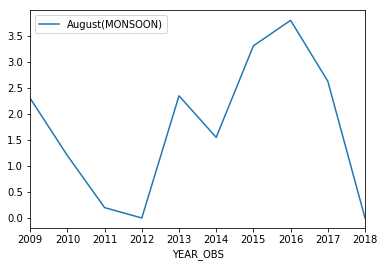

In [7]:
#water table
watertableDF = pd.read_csv('./data/ground_water/PuneWaterTable2009-2018.csv',  encoding = "utf-8")
watertableDF = watertableDF[["WLCODE", "YEAR_OBS", "August(MONSOON)"]]
watertableDF["YEAR_OBS"] = watertableDF["YEAR_OBS"].astype(str)
watertableDF = watertableDF.groupby(['YEAR_OBS']).max().drop("WLCODE", 1)

if not watertableDF.empty:
    watertableDF.plot()
    masterDF = pd.merge(masterDF, watertableDF, how = "left", left_on = "Year", right_on = "YEAR_OBS")
else:
    print("No water table data available")

masterDF

,Year,Temp(deg Centigrade),% Humidity,PM2.5,PM10,Time,Ozone,NOx,SO2,Total Vehicles,TreeCover(sqkm),August(MONSOON),Population
0,2010,23.885714,73.857143,NaN,NaN,NaN,NaN,NaN,NaN,1722804,NaN,1.20,9209722.7
1,2011,20.325000,72.125000,NaN,NaN,NaN,NaN,NaN,NaN,2061226,1732.0,0.20,9429408.0
2,2012,22.685714,66.428571,NaN,NaN,NaN,NaN,NaN,NaN,2037869,NaN,0.00,9649093.3
3,2013,22.800000,62.428571,NaN,NaN,NaN,NaN,NaN,NaN,2.07098e+06,1734.0,2.35,9868778.6
4,2014,20.000000,68.875000,NaN,NaN,NaN,NaN,NaN,NaN,2.23994e+06,NaN,1.55,10088463.9
5,2015,18.912500,78.500000,NaN,NaN,NaN,NaN,NaN,NaN,2303783,1734.0,3.31,10308149.2
6,2016,19.775000,63.000000,NaN,NaN,NaN,0.00,55.37,0.00,NaN,NaN,3.80,10527834.5
7,2017,18.425000,58.250000,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1708.0,2.63,10747519.8
8,2018,19.300000,71.000000,NaN,NaN,NaN,0.00,30.09,0.00,NaN,NaN,0.00,10967205.1
9,2019,18.937500,57.125000,81.55,153.12,00:00,11.45,55.38,90.18,NaN,NaN,NaN,11186890.4


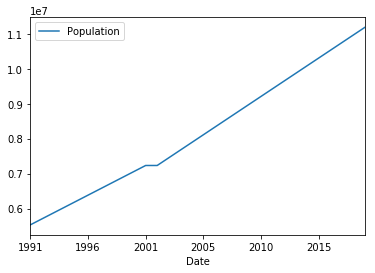

In [8]:
#population
populationDF = pd.read_excel('./data/population_data.xls',  encoding = "utf-8")
populationDF["Date"] = populationDF["Date"].astype(str)
populationDF = populationDF.set_index("Date")

if not populationDF.empty:
    populationDF.plot()
    masterDF = pd.merge(masterDF, populationDF, how = "left", left_on = "Year", right_on = "Date")
else:
    print("No population data available")

masterDF